________________________________________________________________________________
**Import required libraries and modules**
________________________________________________________________________________

In [111]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb
from sklearn import metrics
from sklearn.metrics import accuracy_score
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error, r2_score
from datetime import datetime
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.preprocessing import StandardScaler

________________________________________________________________________________
**Read the data**
________________________________________________________________________________

In [4]:
df = pd.read_csv('/content/master.csv')

In [5]:
df.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


________________________________________________________________________________
**Preprocessing the dataset**
________________________________________________________________________________

In [6]:
print("Dimension of dataset:", df.shape)
print("Number of rows in the dataset:", df.shape[0])
print("Number of columns in the dataset:", df.shape[1])

Dimension of dataset: (27820, 12)
Number of rows in the dataset: 27820
Number of columns in the dataset: 12


In [7]:
df.nunique()

country                 101
year                     32
sex                       2
age                       6
suicides_no            2084
population            25564
suicides/100k pop      5298
country-year           2321
HDI for year            305
 gdp_for_year ($)      2321
gdp_per_capita ($)     2233
generation                6
dtype: int64

In [8]:
df.describe()

,year,suicides_no,population,suicides/100k pop,HDI for year,gdp_per_capita ($)
count,27820.000000,27820.000000,2.782000e+04,27820.000000,8364.000000,27820.000000
mean,2001.258375,242.574407,1.844794e+06,12.816097,0.776601,16866.464414
std,8.469055,902.047917,3.911779e+06,18.961511,0.093367,18887.576472
min,1985.000000,0.000000,2.780000e+02,0.000000,0.483000,251.000000
25%,1995.000000,3.000000,9.749850e+04,0.920000,0.713000,3447.000000
50%,2002.000000,25.000000,4.301500e+05,5.990000,0.779000,9372.000000
75%,2008.000000,131.000000,1.486143e+06,16.620000,0.855000,24874.000000
max,2016.000000,22338.000000,4.380521e+07,224.970000,0.944000,126352.000000


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   country             27820 non-null  object 
 1   year                27820 non-null  int64  
 2   sex                 27820 non-null  object 
 3   age                 27820 non-null  object 
 4   suicides_no         27820 non-null  int64  
 5   population          27820 non-null  int64  
 6   suicides/100k pop   27820 non-null  float64
 7   country-year        27820 non-null  object 
 8   HDI for year        8364 non-null   float64
 9    gdp_for_year ($)   27820 non-null  object 
 10  gdp_per_capita ($)  27820 non-null  int64  
 11  generation          27820 non-null  object 
dtypes: float64(2), int64(4), object(6)
memory usage: 2.5+ MB


In [10]:
miss_val = df.isna().sum()
miss_val

country                   0
year                      0
sex                       0
age                       0
suicides_no               0
population                0
suicides/100k pop         0
country-year              0
HDI for year          19456
 gdp_for_year ($)         0
gdp_per_capita ($)        0
generation                0
dtype: int64

In [11]:
df = df.drop(['HDI for year'],axis = 1)

In [12]:
from numpy.lib.function_base import quantile
suicides_by_country = df.groupby('country').size().reset_index(name='suicides_no')
suicides_by_country = suicides_by_country[suicides_by_country['suicides_no']>suicides_by_country['suicides_no'].quantile(0.75)]
suicides_by_country = suicides_by_country.merge(df, on= 'country',how = 'inner')
suicides_by_country.head()
suicides_by_country['country'].value_counts()

Netherlands          382
Iceland              382
Mauritius            382
Austria              382
Argentina            372
Malta                372
United Kingdom       372
Spain                372
Singapore            372
Republic of Korea    372
Puerto Rico          372
Mexico               372
Japan                372
Luxembourg           372
Italy                372
Israel               372
Greece               372
Ecuador              372
Colombia             372
Chile                372
Brazil               372
Belgium              372
United States        372
Name: country, dtype: int64

________________________________________________________________________________
**Exploratory Data Analysis**
________________________________________________________________________________

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


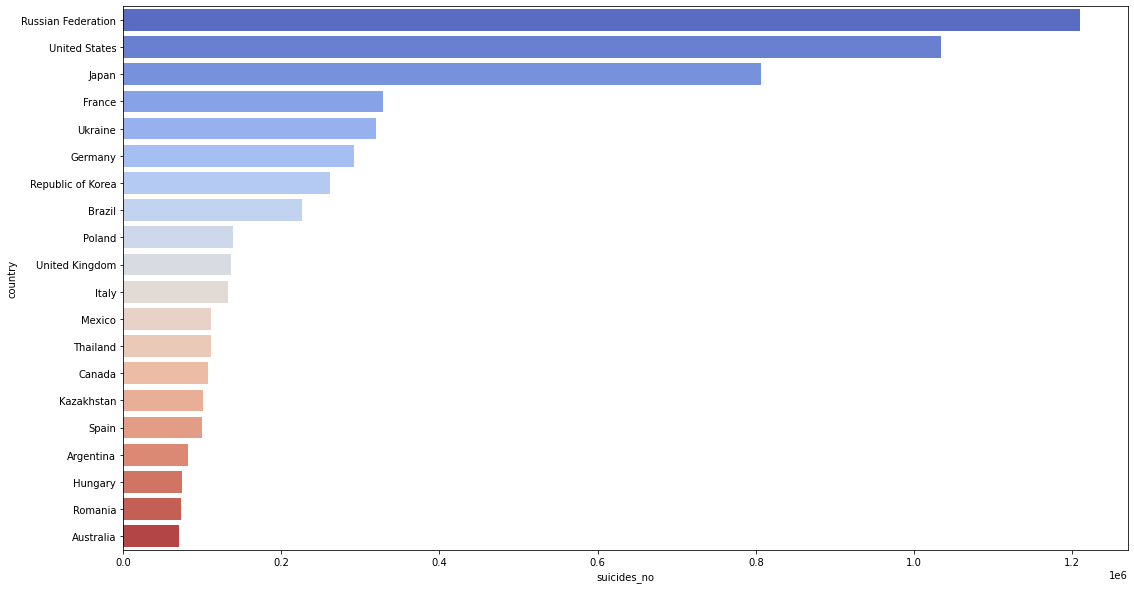

In [13]:
data = df['suicides_no'].groupby(df.country).sum().sort_values(ascending=False)
fig, ax = plt.subplots(figsize=(18,10))
ax = sns.barplot(data.head(20), data.head(20).index, palette="coolwarm")

[Text(0.5, 1.0, 'Suicides by age')]

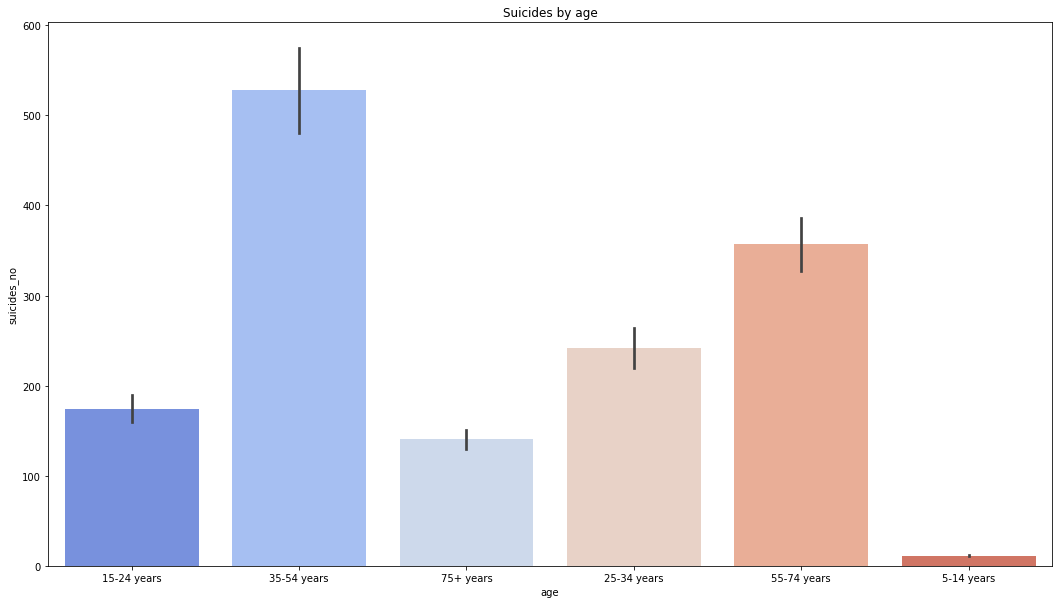

In [14]:
fig, ax = plt.subplots(figsize=(18,10))
sns.barplot(data=df, x='age', y='suicides_no', ax=ax, palette = "coolwarm")
ax.set(title='Suicides by age')

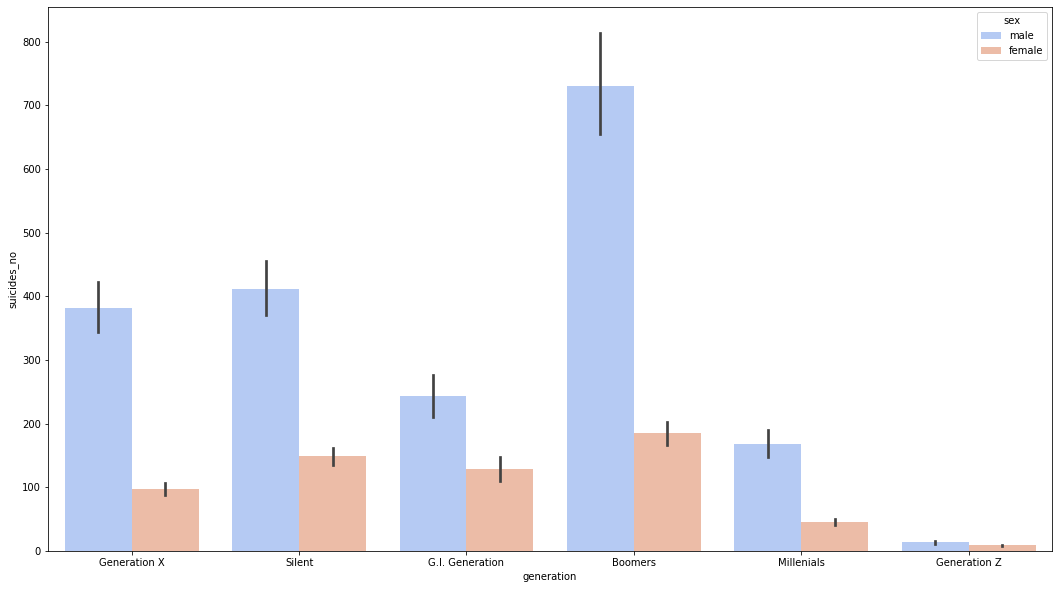

In [15]:
f,ax = plt.subplots(1,1,figsize=(18,10))
ax = sns.barplot(x = df['generation'], y = 'suicides_no',
                  hue='sex',data=df, palette = "coolwarm")

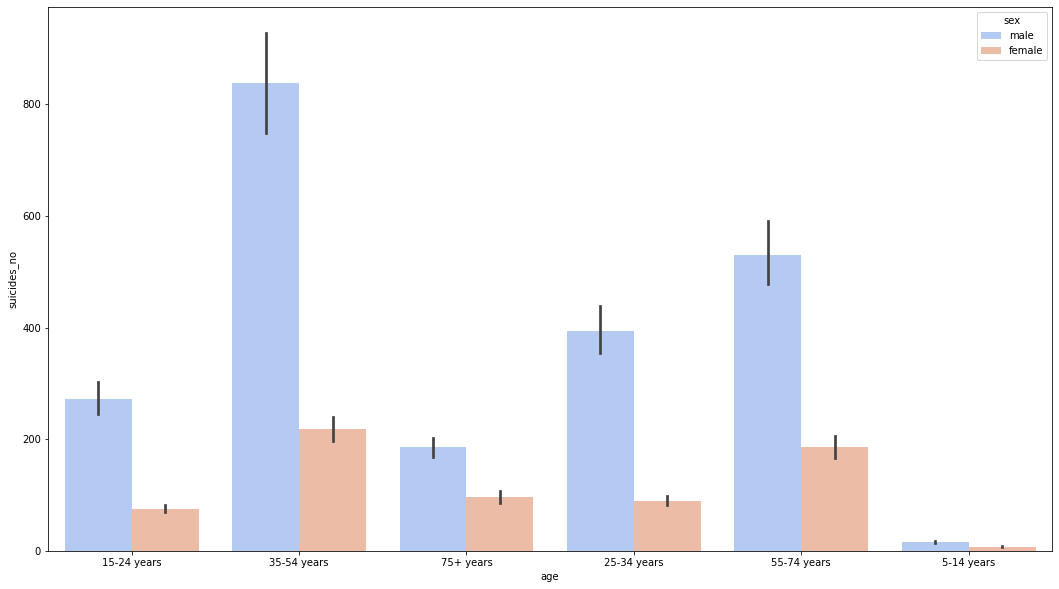

In [16]:
f,ax = plt.subplots(1,1,figsize=(18,10))
ax = sns.barplot(x = df['age'], y = 'suicides_no',
                  hue='sex',data=df, palette = "coolwarm")

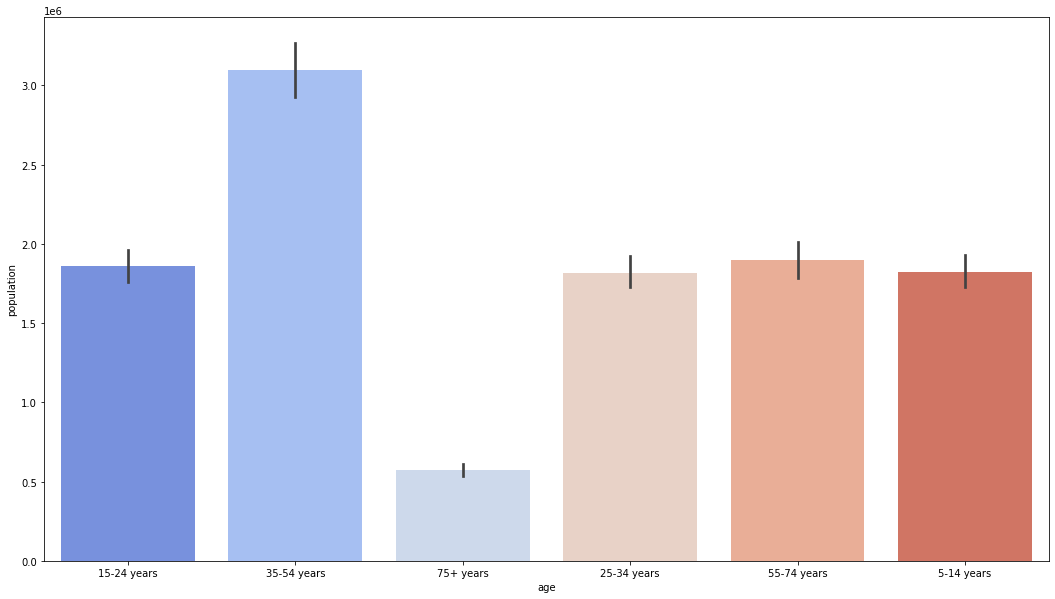

In [17]:
f,ax = plt.subplots(1,1,figsize=(18,10))
ax = sns.barplot(x = df['age'], y = "population",data=df, palette = "coolwarm")

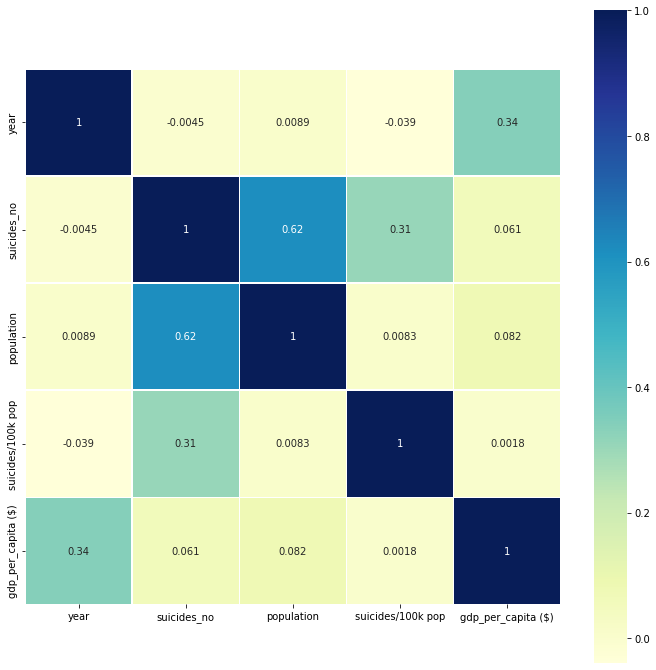

In [18]:
corr = df.corr()
plt.figure(figsize=(12,12))
sns.heatmap(corr, linewidths=.5, annot=True,square=True, cmap="YlGnBu")

________________________________________________________________________________
**Data Preprocessing**
________________________________________________________________________________

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   country             27820 non-null  object 
 1   year                27820 non-null  int64  
 2   sex                 27820 non-null  object 
 3   age                 27820 non-null  object 
 4   suicides_no         27820 non-null  int64  
 5   population          27820 non-null  int64  
 6   suicides/100k pop   27820 non-null  float64
 7   country-year        27820 non-null  object 
 8    gdp_for_year ($)   27820 non-null  object 
 9   gdp_per_capita ($)  27820 non-null  int64  
 10  generation          27820 non-null  object 
dtypes: float64(1), int64(4), object(6)
memory usage: 2.3+ MB


In [20]:
df = df.drop(['suicides/100k pop'],axis = 1)
df = df.drop(['country-year'],axis = 1)

In [21]:
df.rename(columns={'suicides/100k pop':'Suicides100kPop', ' gdp_for_year ($) ':'GDPForYear',
                          'gdp_per_capita ($)':'GDPPerCapita'}, inplace=True)

In [22]:
df.replace(',','', regex=True, inplace=True)

In [23]:
df['GDPForYear'] = df['GDPForYear'].astype(str).astype(int)

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   country       27820 non-null  object
 1   year          27820 non-null  int64 
 2   sex           27820 non-null  object
 3   age           27820 non-null  object
 4   suicides_no   27820 non-null  int64 
 5   population    27820 non-null  int64 
 6   GDPForYear    27820 non-null  int64 
 7   GDPPerCapita  27820 non-null  int64 
 8   generation    27820 non-null  object
dtypes: int64(5), object(4)
memory usage: 1.9+ MB


In [25]:
le = preprocessing.LabelEncoder()
columns = ["age", "sex", 'country', 'generation']

for col in columns:
    df[col] = le.fit_transform(df[col])
    print(le.classes_)
      
data.head(5)

['15-24 years' '25-34 years' '35-54 years' '5-14 years' '55-74 years'
 '75+ years']
['female' 'male']
['Albania' 'Antigua and Barbuda' 'Argentina' 'Armenia' 'Aruba' 'Australia'
 'Austria' 'Azerbaijan' 'Bahamas' 'Bahrain' 'Barbados' 'Belarus' 'Belgium'
 'Belize' 'Bosnia and Herzegovina' 'Brazil' 'Bulgaria' 'Cabo Verde'
 'Canada' 'Chile' 'Colombia' 'Costa Rica' 'Croatia' 'Cuba' 'Cyprus'
 'Czech Republic' 'Denmark' 'Dominica' 'Ecuador' 'El Salvador' 'Estonia'
 'Fiji' 'Finland' 'France' 'Georgia' 'Germany' 'Greece' 'Grenada'
 'Guatemala' 'Guyana' 'Hungary' 'Iceland' 'Ireland' 'Israel' 'Italy'
 'Jamaica' 'Japan' 'Kazakhstan' 'Kiribati' 'Kuwait' 'Kyrgyzstan' 'Latvia'
 'Lithuania' 'Luxembourg' 'Macau' 'Maldives' 'Malta' 'Mauritius' 'Mexico'
 'Mongolia' 'Montenegro' 'Netherlands' 'New Zealand' 'Nicaragua' 'Norway'
 'Oman' 'Panama' 'Paraguay' 'Philippines' 'Poland' 'Portugal'
 'Puerto Rico' 'Qatar' 'Republic of Korea' 'Romania' 'Russian Federation'
 'Saint Kitts and Nevis' 'Saint Lucia' 'Saint 

country
Russian Federation    1209742
United States         1034013
Japan                  806902
France                 329127
Ukraine                319950
Name: suicides_no, dtype: int64

In [26]:
df['age'].value_counts()

0    4642
2    4642
5    4642
1    4642
4    4642
3    4610
Name: age, dtype: int64

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   country       27820 non-null  int64
 1   year          27820 non-null  int64
 2   sex           27820 non-null  int64
 3   age           27820 non-null  int64
 4   suicides_no   27820 non-null  int64
 5   population    27820 non-null  int64
 6   GDPForYear    27820 non-null  int64
 7   GDPPerCapita  27820 non-null  int64
 8   generation    27820 non-null  int64
dtypes: int64(9)
memory usage: 1.9 MB


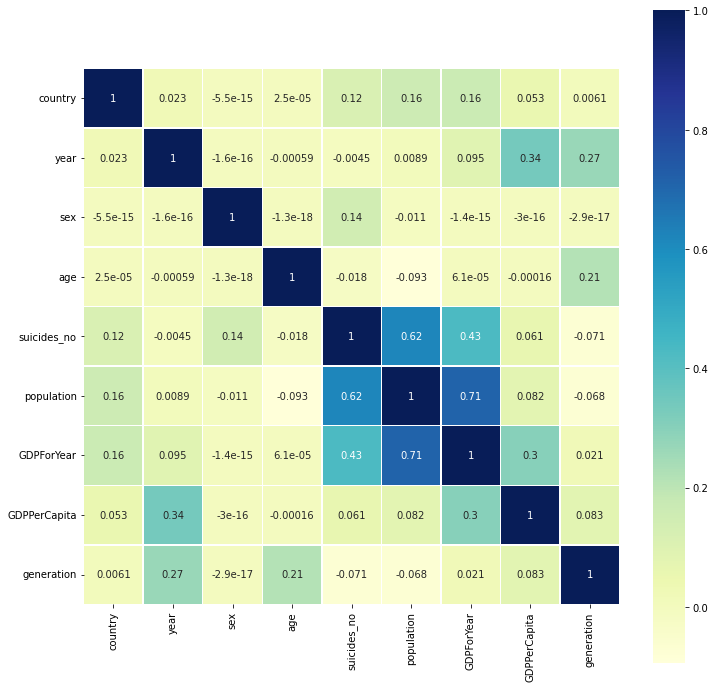

In [28]:
corr = df.corr()
plt.figure(figsize=(12,12))
sns.heatmap(corr, linewidths=.5, annot=True,square=True, cmap="YlGnBu")

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   country       27820 non-null  int64
 1   year          27820 non-null  int64
 2   sex           27820 non-null  int64
 3   age           27820 non-null  int64
 4   suicides_no   27820 non-null  int64
 5   population    27820 non-null  int64
 6   GDPForYear    27820 non-null  int64
 7   GDPPerCapita  27820 non-null  int64
 8   generation    27820 non-null  int64
dtypes: int64(9)
memory usage: 1.9 MB


In [55]:
df.head()

,country,year,sex,age,suicides_no,population,GDPForYear,GDPPerCapita,generation
0,0,1987,1,0,21,312900,2156624900,796,2
1,0,1987,1,2,16,308000,2156624900,796,5
2,0,1987,0,0,14,289700,2156624900,796,2
3,0,1987,1,5,1,21800,2156624900,796,1
4,0,1987,1,1,9,274300,2156624900,796,0


In [57]:
#df['GDPForYear'].replace(',','',regex=True,inplace=True)
#df['GDPForYear']=df['GDPForYear'].astype(int)


________________________________________________________________________________
**Machine Learning**
________________________________________________________________________________

In [58]:
X_train = df.drop(['suicides_no'], axis = 1)
Y_train = df['suicides_no']
X_test = df.drop(['suicides_no'], axis = 1)
Y_test = df['suicides_no']
X_train.shape, Y_train.shape, X_test.shape, Y_test.shape

((27820, 8), (27820,), (27820, 8), (27820,))

**Linear Regression**

In [59]:
model = LinearRegression()
model.fit(X_train, Y_train)

LinearRegression()

In [60]:
preds = model.predict(X_test)

In [61]:
print('Coefficient of determination: %.2f'
      % r2_score(Y_test, preds))

Coefficient of determination: 0.41


In [80]:
print('MAE: {}'.format(metrics.mean_absolute_error(Y_test, preds)))
print('MSE: {}'.format(metrics.mean_squared_error(Y_test, preds)))
print('RMSE: {}'.format(np.sqrt(metrics.mean_squared_error(Y_test, preds))))
metrics.r2_score(Y_test, preds)

MAE: 264.3389407796718
MSE: 485287.26167630526
RMSE: 696.6256251935506


0.4179862100416861

**XGB Regressor**

In [129]:
xgb = XGBRegressor(learning_rate=0.2,max_depth=4)

xgb.fit(X_train, y_train)

[22:56:45] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(learning_rate=0.2, max_depth=4)

In [130]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 12)
X_train.shape, X_test.shape

((22256, 8), (5564, 8))

In [131]:
XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.2, max_delta_step=0, max_depth=4,
             min_child_weight=1, monotone_constraints='()',
             n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

XGBRegressor(gpu_id=-1, interaction_constraints='', learning_rate=0.2,
             max_depth=4, monotone_constraints='()', n_jobs=0,
             num_parallel_tree=1, tree_method='exact', validate_parameters=1,
             verbosity=None)

In [132]:
y_test_xgb = xgb.predict(X_test)
y_train_xgb = xgb.predict(X_train)

In [133]:
acc_train_xgb = xgb.score(X_train, y_train)
acc_test_xgb = xgb.score(X_test, y_test)

rmse_train_xgb = np.sqrt(mean_squared_error(y_train, y_train_xgb))
rmse_test_xgb = np.sqrt(mean_squared_error(y_test, y_test_xgb))

print("XGBoost Regression: Accuracy on training Data: {:.3f}".format(acc_train_xgb))
print("XGBoost Regression: Accuracy on test Data: {:.3f}".format(acc_test_xgb))
print('\nXGBoost Regression: The RMSE of the training set is: ', rmse_train_xgb)
print('XGBoost Regression: The RMSE of the testing set is: ', rmse_test_xgb)

XGBoost Regression: Accuracy on training Data: 0.970
XGBoost Regression: Accuracy on test Data: 0.944

XGBoost Regression: The RMSE of the training set is:  157.8445063309136
XGBoost Regression: The RMSE of the testing set is:  206.41853988246905


**Random Forest**

In [35]:
def model_score(model, txt):
    y_pred = model.predict(X_test)
    x_pred = model.predict(X_train)
    mae_train=metrics.mean_absolute_error(Y_train, x_pred)
    mae_test=metrics.mean_absolute_error(Y_test, y_pred)
    mse=metrics.mean_squared_error(Y_test, y_pred)
    rmse = metrics.mean_squared_error(Y_test, y_pred, squared=False)

    print(txt, model.score(X_test,Y_test))
    print('MAE Train: ', mae_train)
    print('MAE Test: ', mae_test)
    
    return x_pred, y_pred

In [36]:
rf_regressor = RandomForestRegressor(n_estimators = 300 ,  random_state = 0)
rf_regressor.fit(X_train,Y_train)

rf_x_pred, rf_y_pred = model_score(rf_regressor, 'Random Forest Score: ')

Random Forest Score:  0.9976599860090477
MAE Train:  8.473066738557392
MAE Test:  8.473066738557392
